In [2]:
import random
from math import sin
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


# Plotting dataset 
dataset contains 400 samples of two classes (1 and -1)

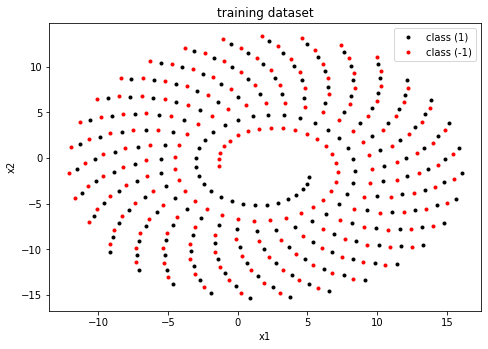

In [3]:
#Declare dataset index U
u = np.arange(1,201,1)

#Declare data points of class 1 (black)
x11 = 2 + (np.sin(0.2*u+8))*(np.sqrt(u+10))
x21 = -1 + (np.cos(0.2*u+8))*(np.sqrt(u+10))
#Declare data points of class -1 (red)
x10 = 2 + (np.sin(0.2*u-8))*(np.sqrt(u+10))
x20 = -1 + (np.cos(0.2*u-8))*(np.sqrt(u+10))

#Plot dataset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(title="training dataset", xlabel ="x1", ylabel="x2")
ax.scatter(x11, x21, marker=".", color ='black', label='class (1)')
ax.scatter(x10, x20, marker=".", color= 'red', label='class (-1)')
ax.legend()

# Creating Input and Output data set for training
Input data set:<br/>
each input data point is a list of 4 features (x1, x2, sin(x1), sin(x2))<br/>
=> 4 units in input layer<br/><br/>
Output data set: <br/>
each data point should be classified in either class 1 or 0<br/>
for some convenient reasons i replace the second class -1 with 0

In [4]:
dataset = list() #list of 400 sublists, each sublist contains 4 input-features and 1 output
inputset = list() #list of 400 sublists, each sublist contains 4 input-features
outputset = list() #list of 400 target outputs

for i in range(200):
    dataset.append([x11[i], x21[i], sin(x11[i]), sin(x21[i]), 1]) 
    dataset.append([x10[i], x20[i], sin(x10[i]), sin(x20[i]), 0])  
    
random.shuffle(dataset)

for sublist in dataset:
    inputset.append(sublist[:4])
    outputset.append(sublist[4])
    
inputset = np.array(inputset)
outputset = np.array(outputset)

# Creating model
the network has 3 hidden layer, each has 16 units <br/>
activation function: tanh for 3 hidden layers, sigmoid for output layer<br/>
batch learning: batch-size = 50<br/>
regularization: none<br/>
optimizer learning rate = 0.01

In [5]:
model = Sequential()
model.add(Dense(units=16, activation = 'tanh', input_dim=4, kernel_initializer='uniform'))
model.add(Dense(units=16, activation = 'tanh', kernel_initializer='uniform'))
model.add(Dense(units=16, activation = 'tanh', kernel_initializer='uniform'))
model.add(Dense(units=1, activation = 'sigmoid', kernel_initializer='uniform'))

#optimizier: RMSprop
#loss funtion: binary_crossentropy
from keras.optimizers import rmsprop
model.compile(optimizer = rmsprop(lr= 0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model

In [6]:
model.fit(inputset, outputset, epochs=2000, batch_size=50 )
predict_outputs = model.predict(inputset)

Epoch 1/2000
400/400 [==============================] - 3s 7ms/step - loss: 0.6962 - accuracy: 0.4300
Epoch 2/2000
400/400 [==============================] - 0s 48us/step - loss: 0.6938 - accuracy: 0.4750
Epoch 3/2000
400/400 [==============================] - 0s 46us/step - loss: 0.6937 - accuracy: 0.4900
Epoch 4/2000
400/400 [==============================] - 0s 51us/step - loss: 0.6936 - accuracy: 0.4875
Epoch 5/2000
400/400 [==============================] - 0s 42us/step - loss: 0.6938 - accuracy: 0.4850
Epoch 6/2000
400/400 [==============================] - 0s 48us/step - loss: 0.6936 - accuracy: 0.4650
Epoch 7/2000
400/400 [==============================] - 0s 42us/step - loss: 0.6934 - accuracy: 0.4775
Epoch 8/2000
400/400 [==============================] - 0s 55us/step - loss: 0.6939 - accuracy: 0.4975
Epoch 9/2000
400/400 [==============================] - 0s 41us/step - loss: 0.6934 - accuracy: 0.4900
Epoch 10/2000
400/400 [==============================] - 0s 38us/step - lo

400/400 [==============================] - 0s 40us/step - loss: 0.6921 - accuracy: 0.5325
Epoch 80/2000
400/400 [==============================] - 0s 37us/step - loss: 0.6924 - accuracy: 0.5150
Epoch 81/2000
400/400 [==============================] - 0s 46us/step - loss: 0.6930 - accuracy: 0.5275
Epoch 82/2000
400/400 [==============================] - 0s 38us/step - loss: 0.6924 - accuracy: 0.5200
Epoch 83/2000
400/400 [==============================] - 0s 33us/step - loss: 0.6929 - accuracy: 0.5275
Epoch 84/2000
400/400 [==============================] - 0s 41us/step - loss: 0.6922 - accuracy: 0.5250
Epoch 85/2000
400/400 [==============================] - 0s 38us/step - loss: 0.6921 - accuracy: 0.5250
Epoch 86/2000
400/400 [==============================] - 0s 58us/step - loss: 0.6929 - accuracy: 0.5325
Epoch 87/2000
400/400 [==============================] - 0s 33us/step - loss: 0.6930 - accuracy: 0.5225
Epoch 88/2000
400/400 [==============================] - 0s 33us/step - loss: 

400/400 [==============================] - 0s 39us/step - loss: 0.6922 - accuracy: 0.5350
Epoch 158/2000
400/400 [==============================] - 0s 46us/step - loss: 0.6922 - accuracy: 0.5375
Epoch 159/2000
400/400 [==============================] - 0s 36us/step - loss: 0.6917 - accuracy: 0.5350
Epoch 160/2000
400/400 [==============================] - 0s 35us/step - loss: 0.6919 - accuracy: 0.5275
Epoch 161/2000
400/400 [==============================] - 0s 35us/step - loss: 0.6913 - accuracy: 0.5350
Epoch 162/2000
400/400 [==============================] - 0s 50us/step - loss: 0.6912 - accuracy: 0.5425
Epoch 163/2000
400/400 [==============================] - 0s 46us/step - loss: 0.6911 - accuracy: 0.5375
Epoch 164/2000
400/400 [==============================] - 0s 54us/step - loss: 0.6911 - accuracy: 0.5375
Epoch 165/2000
400/400 [==============================] - 0s 40us/step - loss: 0.6909 - accuracy: 0.5375
Epoch 166/2000
400/400 [==============================] - 0s 43us/step

400/400 [==============================] - 0s 34us/step - loss: 0.6750 - accuracy: 0.5350
Epoch 236/2000
400/400 [==============================] - 0s 38us/step - loss: 0.6738 - accuracy: 0.5500
Epoch 237/2000
400/400 [==============================] - 0s 34us/step - loss: 0.6722 - accuracy: 0.5250
Epoch 238/2000
400/400 [==============================] - 0s 35us/step - loss: 0.6719 - accuracy: 0.5350
Epoch 239/2000
400/400 [==============================] - 0s 35us/step - loss: 0.6712 - accuracy: 0.5525
Epoch 240/2000
400/400 [==============================] - 0s 48us/step - loss: 0.6723 - accuracy: 0.5475
Epoch 241/2000
400/400 [==============================] - 0s 35us/step - loss: 0.6702 - accuracy: 0.5575
Epoch 242/2000
400/400 [==============================] - 0s 47us/step - loss: 0.6774 - accuracy: 0.5500
Epoch 243/2000
400/400 [==============================] - 0s 35us/step - loss: 0.6669 - accuracy: 0.5375
Epoch 244/2000
400/400 [==============================] - 0s 32us/step

400/400 [==============================] - 0s 86us/step - loss: 0.6403 - accuracy: 0.5850
Epoch 314/2000
400/400 [==============================] - 0s 67us/step - loss: 0.6505 - accuracy: 0.5425
Epoch 315/2000
400/400 [==============================] - 0s 63us/step - loss: 0.6464 - accuracy: 0.5225
Epoch 316/2000
400/400 [==============================] - 0s 108us/step - loss: 0.6420 - accuracy: 0.5425
Epoch 317/2000
400/400 [==============================] - 0s 78us/step - loss: 0.6379 - accuracy: 0.5675
Epoch 318/2000
400/400 [==============================] - 0s 85us/step - loss: 0.6429 - accuracy: 0.5725
Epoch 319/2000
400/400 [==============================] - 0s 68us/step - loss: 0.6411 - accuracy: 0.5425
Epoch 320/2000
400/400 [==============================] - 0s 70us/step - loss: 0.6457 - accuracy: 0.5600
Epoch 321/2000
400/400 [==============================] - 0s 61us/step - loss: 0.6412 - accuracy: 0.5550
Epoch 322/2000
400/400 [==============================] - 0s 99us/ste

400/400 [==============================] - 0s 65us/step - loss: 0.6173 - accuracy: 0.5975
Epoch 392/2000
400/400 [==============================] - 0s 59us/step - loss: 0.6326 - accuracy: 0.6075
Epoch 393/2000
400/400 [==============================] - 0s 80us/step - loss: 0.6115 - accuracy: 0.5950
Epoch 394/2000
400/400 [==============================] - 0s 84us/step - loss: 0.6133 - accuracy: 0.6025
Epoch 395/2000
400/400 [==============================] - 0s 74us/step - loss: 0.6243 - accuracy: 0.5825
Epoch 396/2000
400/400 [==============================] - 0s 66us/step - loss: 0.6109 - accuracy: 0.6125
Epoch 397/2000
400/400 [==============================] - 0s 76us/step - loss: 0.6125 - accuracy: 0.6225
Epoch 398/2000
400/400 [==============================] - 0s 57us/step - loss: 0.6130 - accuracy: 0.6050
Epoch 399/2000
400/400 [==============================] - 0s 86us/step - loss: 0.6179 - accuracy: 0.5975
Epoch 400/2000
400/400 [==============================] - 0s 59us/step

400/400 [==============================] - 0s 73us/step - loss: 0.5855 - accuracy: 0.6225
Epoch 470/2000
400/400 [==============================] - 0s 61us/step - loss: 0.6051 - accuracy: 0.6325
Epoch 471/2000
400/400 [==============================] - 0s 67us/step - loss: 0.5881 - accuracy: 0.6500
Epoch 472/2000
400/400 [==============================] - 0s 49us/step - loss: 0.6000 - accuracy: 0.6275
Epoch 473/2000
400/400 [==============================] - 0s 67us/step - loss: 0.5802 - accuracy: 0.6300
Epoch 474/2000
400/400 [==============================] - 0s 67us/step - loss: 0.5899 - accuracy: 0.6225
Epoch 475/2000
400/400 [==============================] - 0s 89us/step - loss: 0.5987 - accuracy: 0.6325
Epoch 476/2000
400/400 [==============================] - 0s 73us/step - loss: 0.5849 - accuracy: 0.6050
Epoch 477/2000
400/400 [==============================] - 0s 78us/step - loss: 0.5741 - accuracy: 0.6325
Epoch 478/2000
400/400 [==============================] - 0s 73us/step

400/400 [==============================] - 0s 61us/step - loss: 0.5532 - accuracy: 0.6600
Epoch 548/2000
400/400 [==============================] - 0s 60us/step - loss: 0.5566 - accuracy: 0.6525
Epoch 549/2000
400/400 [==============================] - 0s 75us/step - loss: 0.5752 - accuracy: 0.6575
Epoch 550/2000
400/400 [==============================] - 0s 78us/step - loss: 0.5653 - accuracy: 0.6500
Epoch 551/2000
400/400 [==============================] - 0s 70us/step - loss: 0.5425 - accuracy: 0.6725
Epoch 552/2000
400/400 [==============================] - 0s 82us/step - loss: 0.5547 - accuracy: 0.6750
Epoch 553/2000
400/400 [==============================] - 0s 58us/step - loss: 0.5420 - accuracy: 0.6700
Epoch 554/2000
400/400 [==============================] - 0s 68us/step - loss: 0.5538 - accuracy: 0.6700
Epoch 555/2000
400/400 [==============================] - 0s 65us/step - loss: 0.5571 - accuracy: 0.6650
Epoch 556/2000
400/400 [==============================] - 0s 67us/step

400/400 [==============================] - 0s 72us/step - loss: 0.5198 - accuracy: 0.6825
Epoch 626/2000
400/400 [==============================] - 0s 69us/step - loss: 0.5263 - accuracy: 0.6800
Epoch 627/2000
400/400 [==============================] - 0s 109us/step - loss: 0.5245 - accuracy: 0.6700
Epoch 628/2000
400/400 [==============================] - 0s 94us/step - loss: 0.5426 - accuracy: 0.6850
Epoch 629/2000
400/400 [==============================] - 0s 94us/step - loss: 0.5278 - accuracy: 0.6750
Epoch 630/2000
400/400 [==============================] - 0s 79us/step - loss: 0.5299 - accuracy: 0.6575
Epoch 631/2000
400/400 [==============================] - 0s 94us/step - loss: 0.5224 - accuracy: 0.6725
Epoch 632/2000
400/400 [==============================] - 0s 78us/step - loss: 0.5212 - accuracy: 0.6750
Epoch 633/2000
400/400 [==============================] - 0s 95us/step - loss: 0.5319 - accuracy: 0.6725
Epoch 634/2000
400/400 [==============================] - 0s 72us/ste

400/400 [==============================] - 0s 57us/step - loss: 0.4918 - accuracy: 0.7000
Epoch 703/2000
400/400 [==============================] - 0s 80us/step - loss: 0.4992 - accuracy: 0.6925
Epoch 704/2000
400/400 [==============================] - 0s 69us/step - loss: 0.5017 - accuracy: 0.6950
Epoch 705/2000
400/400 [==============================] - 0s 58us/step - loss: 0.5066 - accuracy: 0.7000
Epoch 706/2000
400/400 [==============================] - 0s 66us/step - loss: 0.5015 - accuracy: 0.7000
Epoch 707/2000
400/400 [==============================] - 0s 61us/step - loss: 0.4980 - accuracy: 0.6825
Epoch 708/2000
400/400 [==============================] - 0s 59us/step - loss: 0.4850 - accuracy: 0.6875
Epoch 709/2000
400/400 [==============================] - 0s 59us/step - loss: 0.4975 - accuracy: 0.6850
Epoch 710/2000
400/400 [==============================] - 0s 72us/step - loss: 0.5112 - accuracy: 0.7100
Epoch 711/2000
400/400 [==============================] - 0s 70us/step

400/400 [==============================] - 0s 63us/step - loss: 0.4793 - accuracy: 0.6950
Epoch 781/2000
400/400 [==============================] - 0s 85us/step - loss: 0.4743 - accuracy: 0.7025
Epoch 782/2000
400/400 [==============================] - 0s 89us/step - loss: 0.4606 - accuracy: 0.7150
Epoch 783/2000
400/400 [==============================] - 0s 83us/step - loss: 0.4943 - accuracy: 0.7225
Epoch 784/2000
400/400 [==============================] - 0s 114us/step - loss: 0.4703 - accuracy: 0.7250
Epoch 785/2000
400/400 [==============================] - 0s 91us/step - loss: 0.4758 - accuracy: 0.7225
Epoch 786/2000
400/400 [==============================] - 0s 86us/step - loss: 0.4871 - accuracy: 0.6925
Epoch 787/2000
400/400 [==============================] - 0s 68us/step - loss: 0.4747 - accuracy: 0.6925
Epoch 788/2000
400/400 [==============================] - 0s 58us/step - loss: 0.4643 - accuracy: 0.7175
Epoch 789/2000
400/400 [==============================] - 0s 91us/ste

400/400 [==============================] - 0s 62us/step - loss: 0.4357 - accuracy: 0.7275
Epoch 859/2000
400/400 [==============================] - 0s 84us/step - loss: 0.4356 - accuracy: 0.7625
Epoch 860/2000
400/400 [==============================] - 0s 64us/step - loss: 0.4330 - accuracy: 0.7425
Epoch 861/2000
400/400 [==============================] - 0s 107us/step - loss: 0.4214 - accuracy: 0.7500
Epoch 862/2000
400/400 [==============================] - 0s 93us/step - loss: 0.4270 - accuracy: 0.7375
Epoch 863/2000
400/400 [==============================] - 0s 60us/step - loss: 0.4548 - accuracy: 0.7100
Epoch 864/2000
400/400 [==============================] - 0s 69us/step - loss: 0.4339 - accuracy: 0.7425
Epoch 865/2000
400/400 [==============================] - 0s 82us/step - loss: 0.4563 - accuracy: 0.7475
Epoch 866/2000
400/400 [==============================] - 0s 64us/step - loss: 0.4230 - accuracy: 0.7600
Epoch 867/2000
400/400 [==============================] - 0s 79us/ste

400/400 [==============================] - 0s 62us/step - loss: 0.4506 - accuracy: 0.7600
Epoch 937/2000
400/400 [==============================] - 0s 50us/step - loss: 0.3947 - accuracy: 0.7775
Epoch 938/2000
400/400 [==============================] - 0s 79us/step - loss: 0.3799 - accuracy: 0.7775
Epoch 939/2000
400/400 [==============================] - 0s 61us/step - loss: 0.3828 - accuracy: 0.7600
Epoch 940/2000
400/400 [==============================] - 0s 72us/step - loss: 0.3879 - accuracy: 0.7925
Epoch 941/2000
400/400 [==============================] - 0s 61us/step - loss: 0.4197 - accuracy: 0.7650
Epoch 942/2000
400/400 [==============================] - 0s 93us/step - loss: 0.3842 - accuracy: 0.8000
Epoch 943/2000
400/400 [==============================] - 0s 92us/step - loss: 0.3792 - accuracy: 0.7900
Epoch 944/2000
400/400 [==============================] - 0s 72us/step - loss: 0.3945 - accuracy: 0.7750
Epoch 945/2000
400/400 [==============================] - 0s 56us/step

400/400 [==============================] - 0s 63us/step - loss: 0.3912 - accuracy: 0.7900
Epoch 1015/2000
400/400 [==============================] - 0s 64us/step - loss: 0.3714 - accuracy: 0.8050
Epoch 1016/2000
400/400 [==============================] - 0s 63us/step - loss: 0.3592 - accuracy: 0.8050
Epoch 1017/2000
400/400 [==============================] - 0s 55us/step - loss: 0.3631 - accuracy: 0.7975
Epoch 1018/2000
400/400 [==============================] - 0s 60us/step - loss: 0.3634 - accuracy: 0.8000
Epoch 1019/2000
400/400 [==============================] - 0s 52us/step - loss: 0.3587 - accuracy: 0.8150
Epoch 1020/2000
400/400 [==============================] - 0s 66us/step - loss: 0.3581 - accuracy: 0.8250
Epoch 1021/2000
400/400 [==============================] - 0s 69us/step - loss: 0.3942 - accuracy: 0.7775
Epoch 1022/2000
400/400 [==============================] - 0s 77us/step - loss: 0.3497 - accuracy: 0.8100
Epoch 1023/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 71us/step - loss: 0.3428 - accuracy: 0.8225
Epoch 1092/2000
400/400 [==============================] - 0s 55us/step - loss: 0.3289 - accuracy: 0.8325
Epoch 1093/2000
400/400 [==============================] - 0s 61us/step - loss: 0.3379 - accuracy: 0.8300
Epoch 1094/2000
400/400 [==============================] - 0s 84us/step - loss: 0.3770 - accuracy: 0.8075
Epoch 1095/2000
400/400 [==============================] - 0s 73us/step - loss: 0.3359 - accuracy: 0.8375
Epoch 1096/2000
400/400 [==============================] - 0s 77us/step - loss: 0.3241 - accuracy: 0.8425
Epoch 1097/2000
400/400 [==============================] - 0s 82us/step - loss: 0.3098 - accuracy: 0.8450
Epoch 1098/2000
400/400 [==============================] - 0s 101us/step - loss: 0.3534 - accuracy: 0.8375
Epoch 1099/2000
400/400 [==============================] - 0s 88us/step - loss: 0.3438 - accuracy: 0.8150
Epoch 1100/2000
400/400 [==============================] - 0s

400/400 [==============================] - 0s 47us/step - loss: 0.3258 - accuracy: 0.8500
Epoch 1169/2000
400/400 [==============================] - 0s 69us/step - loss: 0.3539 - accuracy: 0.8275
Epoch 1170/2000
400/400 [==============================] - 0s 58us/step - loss: 0.3127 - accuracy: 0.8450
Epoch 1171/2000
400/400 [==============================] - 0s 68us/step - loss: 0.2896 - accuracy: 0.8450
Epoch 1172/2000
400/400 [==============================] - 0s 82us/step - loss: 0.3014 - accuracy: 0.8550
Epoch 1173/2000
400/400 [==============================] - 0s 70us/step - loss: 0.3401 - accuracy: 0.8200
Epoch 1174/2000
400/400 [==============================] - 0s 66us/step - loss: 0.3562 - accuracy: 0.8175
Epoch 1175/2000
400/400 [==============================] - 0s 71us/step - loss: 0.3191 - accuracy: 0.8625
Epoch 1176/2000
400/400 [==============================] - 0s 85us/step - loss: 0.2937 - accuracy: 0.8550
Epoch 1177/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 80us/step - loss: 0.3061 - accuracy: 0.8450
Epoch 1246/2000
400/400 [==============================] - 0s 67us/step - loss: 0.2865 - accuracy: 0.8500
Epoch 1247/2000
400/400 [==============================] - 0s 84us/step - loss: 0.2984 - accuracy: 0.8475
Epoch 1248/2000
400/400 [==============================] - 0s 56us/step - loss: 0.2848 - accuracy: 0.8575
Epoch 1249/2000
400/400 [==============================] - 0s 71us/step - loss: 0.2720 - accuracy: 0.8450
Epoch 1250/2000
400/400 [==============================] - 0s 51us/step - loss: 0.2801 - accuracy: 0.8575
Epoch 1251/2000
400/400 [==============================] - 0s 29us/step - loss: 0.2980 - accuracy: 0.8400
Epoch 1252/2000
400/400 [==============================] - 0s 29us/step - loss: 0.3171 - accuracy: 0.8300
Epoch 1253/2000
400/400 [==============================] - 0s 30us/step - loss: 0.2695 - accuracy: 0.8650
Epoch 1254/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 48us/step - loss: 0.3552 - accuracy: 0.8325
Epoch 1323/2000
400/400 [==============================] - 0s 42us/step - loss: 0.2775 - accuracy: 0.8525
Epoch 1324/2000
400/400 [==============================] - 0s 81us/step - loss: 0.2727 - accuracy: 0.8475
Epoch 1325/2000
400/400 [==============================] - 0s 71us/step - loss: 0.2403 - accuracy: 0.8825
Epoch 1326/2000
400/400 [==============================] - 0s 79us/step - loss: 0.2448 - accuracy: 0.8700
Epoch 1327/2000
400/400 [==============================] - 0s 62us/step - loss: 0.2385 - accuracy: 0.8750
Epoch 1328/2000
400/400 [==============================] - 0s 59us/step - loss: 0.2770 - accuracy: 0.8500
Epoch 1329/2000
400/400 [==============================] - 0s 79us/step - loss: 0.3103 - accuracy: 0.8400
Epoch 1330/2000
400/400 [==============================] - 0s 57us/step - loss: 0.2638 - accuracy: 0.8750
Epoch 1331/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 61us/step - loss: 0.2979 - accuracy: 0.8575
Epoch 1400/2000
400/400 [==============================] - 0s 59us/step - loss: 0.2559 - accuracy: 0.8675
Epoch 1401/2000
400/400 [==============================] - 0s 84us/step - loss: 0.2769 - accuracy: 0.8475
Epoch 1402/2000
400/400 [==============================] - 0s 68us/step - loss: 0.2208 - accuracy: 0.8800
Epoch 1403/2000
400/400 [==============================] - 0s 66us/step - loss: 0.2307 - accuracy: 0.8800
Epoch 1404/2000
400/400 [==============================] - 0s 64us/step - loss: 0.2626 - accuracy: 0.8775
Epoch 1405/2000
400/400 [==============================] - 0s 82us/step - loss: 0.2523 - accuracy: 0.8775
Epoch 1406/2000
400/400 [==============================] - 0s 79us/step - loss: 0.2928 - accuracy: 0.8475
Epoch 1407/2000
400/400 [==============================] - 0s 70us/step - loss: 0.2282 - accuracy: 0.8775
Epoch 1408/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 92us/step - loss: 0.2426 - accuracy: 0.8575
Epoch 1477/2000
400/400 [==============================] - 0s 84us/step - loss: 0.2588 - accuracy: 0.8700
Epoch 1478/2000
400/400 [==============================] - 0s 75us/step - loss: 0.2375 - accuracy: 0.8700
Epoch 1479/2000
400/400 [==============================] - 0s 77us/step - loss: 0.2426 - accuracy: 0.8700
Epoch 1480/2000
400/400 [==============================] - 0s 70us/step - loss: 0.2082 - accuracy: 0.8975
Epoch 1481/2000
400/400 [==============================] - 0s 62us/step - loss: 0.2607 - accuracy: 0.8675
Epoch 1482/2000
400/400 [==============================] - 0s 76us/step - loss: 0.2635 - accuracy: 0.8750
Epoch 1483/2000
400/400 [==============================] - 0s 59us/step - loss: 0.2265 - accuracy: 0.8625
Epoch 1484/2000
400/400 [==============================] - 0s 56us/step - loss: 0.2414 - accuracy: 0.8700
Epoch 1485/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 55us/step - loss: 0.1982 - accuracy: 0.8875
Epoch 1554/2000
400/400 [==============================] - 0s 45us/step - loss: 0.2308 - accuracy: 0.8675
Epoch 1555/2000
400/400 [==============================] - 0s 48us/step - loss: 0.2862 - accuracy: 0.8650
Epoch 1556/2000
400/400 [==============================] - 0s 77us/step - loss: 0.2707 - accuracy: 0.8575
Epoch 1557/2000
400/400 [==============================] - 0s 77us/step - loss: 0.2166 - accuracy: 0.8750
Epoch 1558/2000
400/400 [==============================] - 0s 82us/step - loss: 0.1989 - accuracy: 0.8975
Epoch 1559/2000
400/400 [==============================] - 0s 82us/step - loss: 0.2334 - accuracy: 0.8750
Epoch 1560/2000
400/400 [==============================] - 0s 80us/step - loss: 0.3075 - accuracy: 0.8550
Epoch 1561/2000
400/400 [==============================] - 0s 43us/step - loss: 0.2277 - accuracy: 0.8700
Epoch 1562/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 45us/step - loss: 0.2147 - accuracy: 0.8850
Epoch 1631/2000
400/400 [==============================] - 0s 70us/step - loss: 0.1960 - accuracy: 0.8925
Epoch 1632/2000
400/400 [==============================] - 0s 64us/step - loss: 0.2106 - accuracy: 0.8875
Epoch 1633/2000
400/400 [==============================] - 0s 60us/step - loss: 0.2085 - accuracy: 0.8800
Epoch 1634/2000
400/400 [==============================] - 0s 61us/step - loss: 0.2056 - accuracy: 0.8950
Epoch 1635/2000
400/400 [==============================] - 0s 65us/step - loss: 0.1960 - accuracy: 0.8950
Epoch 1636/2000
400/400 [==============================] - 0s 54us/step - loss: 0.2571 - accuracy: 0.8700
Epoch 1637/2000
400/400 [==============================] - 0s 76us/step - loss: 0.2178 - accuracy: 0.8900
Epoch 1638/2000
400/400 [==============================] - 0s 67us/step - loss: 0.2063 - accuracy: 0.8700
Epoch 1639/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 59us/step - loss: 0.2209 - accuracy: 0.8825
Epoch 1708/2000
400/400 [==============================] - 0s 79us/step - loss: 0.1990 - accuracy: 0.8875
Epoch 1709/2000
400/400 [==============================] - 0s 71us/step - loss: 0.1843 - accuracy: 0.8800
Epoch 1710/2000
400/400 [==============================] - 0s 74us/step - loss: 0.1742 - accuracy: 0.9050
Epoch 1711/2000
400/400 [==============================] - 0s 61us/step - loss: 0.2410 - accuracy: 0.8825
Epoch 1712/2000
400/400 [==============================] - 0s 82us/step - loss: 0.1921 - accuracy: 0.8975
Epoch 1713/2000
400/400 [==============================] - 0s 55us/step - loss: 0.2636 - accuracy: 0.8675
Epoch 1714/2000
400/400 [==============================] - 0s 64us/step - loss: 0.2010 - accuracy: 0.8850
Epoch 1715/2000
400/400 [==============================] - 0s 73us/step - loss: 0.1881 - accuracy: 0.9050
Epoch 1716/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 58us/step - loss: 0.1579 - accuracy: 0.9150
Epoch 1785/2000
400/400 [==============================] - 0s 73us/step - loss: 0.2473 - accuracy: 0.8875
Epoch 1786/2000
400/400 [==============================] - 0s 46us/step - loss: 0.1857 - accuracy: 0.8950
Epoch 1787/2000
400/400 [==============================] - 0s 78us/step - loss: 0.1742 - accuracy: 0.8975
Epoch 1788/2000
400/400 [==============================] - 0s 66us/step - loss: 0.2012 - accuracy: 0.8825
Epoch 1789/2000
400/400 [==============================] - 0s 74us/step - loss: 0.2423 - accuracy: 0.8700
Epoch 1790/2000
400/400 [==============================] - 0s 83us/step - loss: 0.1931 - accuracy: 0.9000
Epoch 1791/2000
400/400 [==============================] - 0s 71us/step - loss: 0.1572 - accuracy: 0.9125
Epoch 1792/2000
400/400 [==============================] - 0s 80us/step - loss: 0.1509 - accuracy: 0.9175
Epoch 1793/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 57us/step - loss: 0.1695 - accuracy: 0.9025
Epoch 1862/2000
400/400 [==============================] - 0s 58us/step - loss: 0.1976 - accuracy: 0.8925
Epoch 1863/2000
400/400 [==============================] - 0s 64us/step - loss: 0.1518 - accuracy: 0.9150
Epoch 1864/2000
400/400 [==============================] - 0s 73us/step - loss: 0.1572 - accuracy: 0.9050
Epoch 1865/2000
400/400 [==============================] - 0s 90us/step - loss: 0.2000 - accuracy: 0.8950
Epoch 1866/2000
400/400 [==============================] - 0s 97us/step - loss: 0.1807 - accuracy: 0.9050
Epoch 1867/2000
400/400 [==============================] - 0s 107us/step - loss: 0.1601 - accuracy: 0.9125
Epoch 1868/2000
400/400 [==============================] - 0s 79us/step - loss: 0.1862 - accuracy: 0.9000
Epoch 1869/2000
400/400 [==============================] - 0s 64us/step - loss: 0.1671 - accuracy: 0.9050
Epoch 1870/2000
400/400 [==============================] - 0s

400/400 [==============================] - 0s 63us/step - loss: 0.1492 - accuracy: 0.9200
Epoch 1939/2000
400/400 [==============================] - 0s 51us/step - loss: 0.1703 - accuracy: 0.9150
Epoch 1940/2000
400/400 [==============================] - 0s 60us/step - loss: 0.1633 - accuracy: 0.9150
Epoch 1941/2000
400/400 [==============================] - 0s 68us/step - loss: 0.1886 - accuracy: 0.9025
Epoch 1942/2000
400/400 [==============================] - 0s 68us/step - loss: 0.1925 - accuracy: 0.9100
Epoch 1943/2000
400/400 [==============================] - 0s 67us/step - loss: 0.1932 - accuracy: 0.9100
Epoch 1944/2000
400/400 [==============================] - 0s 62us/step - loss: 0.1400 - accuracy: 0.9250
Epoch 1945/2000
400/400 [==============================] - 0s 67us/step - loss: 0.1405 - accuracy: 0.9275
Epoch 1946/2000
400/400 [==============================] - 0s 63us/step - loss: 0.1485 - accuracy: 0.9075
Epoch 1947/2000
400/400 [==============================] - 0s 

# Plotting Predicted Outputs
the model has an accuracy of 94,25% after 2000 epochs

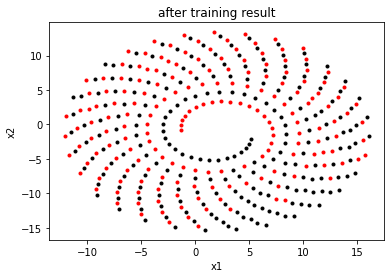

In [8]:
plt.title("after training result")
plt.xlabel("x1")
plt.ylabel("x2")

for i in range(400):
    if predict_outputs[i] > 0.5:
        plt.scatter(inputset[i][0], inputset[i][1] , marker=".", color='black')
    else :    
        plt.scatter(inputset[i][0], inputset[i][1] , marker=".", color='red')


# Plotting predicted ouputs on input dataset of (x1,x2) = [-16,16][-16,16] 

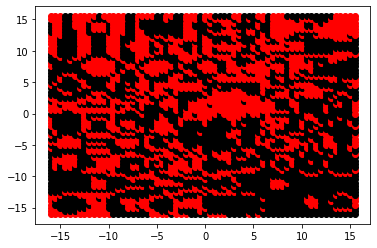

In [12]:
for x1 in np.arange(-16, 16, 0.5): #mit 0,1 wird bei mir unendlich laufen
    for x2 in np.arange(-16, 16, 0.5):
        prediction = model.predict(np.array([[x1, x2, sin(x1), sin(x2)]]))
        if prediction > 0.5:
            color = 'black'
        else:
            color = 'red'

        plt.scatter(x1, x2, c=color)
        
plt.show()